# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



In [1]:
# Importing the Libraries Required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "http://bit.ly/w-data"
student = pd.read_csv(url)

student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Checking gfor the null values

student.isnull().sum()

Hours     0
Scores    0
dtype: int64

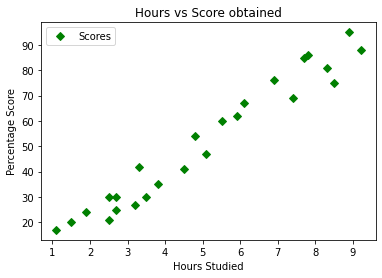

In [6]:
## Correlation Plot

student.plot(x='Hours', y='Scores', style='D', color='G')
plt.title('Hours vs Score obtained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### Predicting  data for the model

In [7]:
# Lets split our dataset in dependent and independ variables

x= student.iloc[:, :-1].values  
y = student.iloc[:, 1].values

In [8]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### Training the data using Logistic Regression Algorithm

In [9]:
# Fitting the data in the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [10]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9526947647057274


In [11]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)


intercept: 2.018160041434683
slope: [9.91065648]


In [12]:
# Predicting the Result
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Accuracy of training and testing data
print(f'The train score:  {model.score(X_train,y_train)}')
print(f'The test score:   {model.score(X_test,y_test)}')

The train score:  0.9515510725211552
The test score:   0.9454906892105356


In [15]:
# Calculating the mean absolute error and mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('mean squared error: ', mean_squared_error(y_test,y_pred))
print('mean absolute error: ', mean_absolute_error(y_test,y_pred))

mean squared error:  21.5987693072174
mean absolute error:  4.183859899002975


#### Predict the result

In [16]:
# Predicting the result for the input of 9.25 Hours 
hours = [[9.25]]
pred1 = model.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred1))

Number of Hours = [[9.25]]
Predicted Score = [93.69173249]


#### Optional

To predict the best algorithm with the best accuracy we installed lazypredict, XGBoost and lightgbm

In [17]:
# Installation lazypredict and XGBoost
!pip install lazypredict
!pip install xgboost

^C


In [19]:
import xgboost as xgb
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Installation of lightgbm
!pip install lightgbm

In [20]:
# Fitting the data into the model
clf = LazyRegressor(ignore_warnings=True)
model1, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:01<00:00, 32.51it/s]


In [21]:
# Predicting the best algorithm with least RMSE
model1

,R-Squared,RMSE,Time Taken
Model,,,
Ridge,0.95,4.39,0.01
Lasso,0.95,4.41,0.01
ElasticNetCV,0.95,4.48,0.07
LassoCV,0.95,4.51,0.08
SGDRegressor,0.95,4.59,0.01
RidgeCV,0.95,4.61,0.02
BayesianRidge,0.95,4.63,0.02
OrthogonalMatchingPursuit,0.95,4.65,0.01
LassoLarsIC,0.95,4.65,0.02


#### Lasso algorithm has the least RMSE

In [22]:
# Implementing Lasso algorithm

from sklearn.linear_model import Lasso
model2 = Lasso()
model2.fit(X_train, y_train)
print('Train accuracy')
print(model2.score(X_train, y_train))
print('\nTest accuracy')
print(model2.score(X_test, y_test))

Train accuracy
0.951297282107653

Test accuracy
0.9482597940686199


In [23]:
# Predicting the Result

pred2 = model2.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred2))

Number of Hours = [[9.25]]
Predicted Score = [93.04269714]


### Conclusion

In [24]:
print('Linear Regression')
print('Test accuracy: ',model.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',pred1,'\n')
print('*'*50,'\n')
print('Lasso')
print('Test accuracy: ',model2.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',pred2)

Linear Regression
Test accuracy:  0.9454906892105356
Predicted score for 9.25 hours:  [93.69173249] 

************************************************** 

Lasso
Test accuracy:  0.9482597940686199
Predicted score for 9.25 hours:  [93.04269714]
